# Putting it all together

In [1]:
univ_colnum = 9 #change

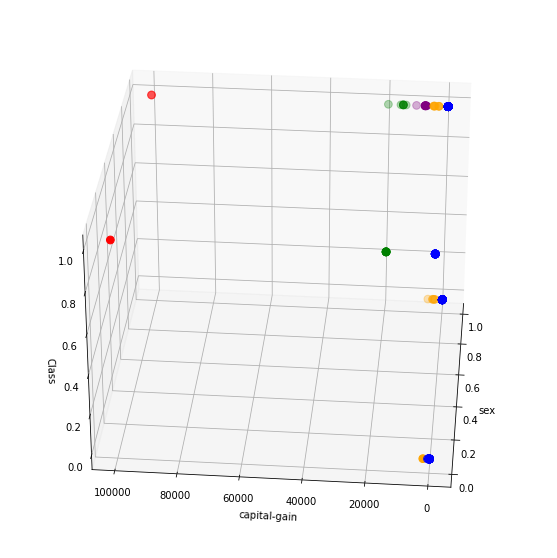

df_presentation:
    sex  capital-gain  class  label      sex  capital-gain   color
0    1             0      1      0     Male             0    Blue
1    0             0      1      0   Female             0    Blue
2    1             0      0      0     Male             0    Blue
3    1             0      0      0     Male             0    Blue
4    1             0      1      0     Male             0    Blue
5    1             0      1      0     Male             0    Blue
6    1             0      1      0     Male             0    Blue
7    0             0      0      0   Female             0    Blue
8    0             0      0      0   Female             0    Blue
9    1             0      1      0     Male             0    Blue
10   1             0      1      0     Male             0    Blue
11   1             0      1      0     Male             0    Blue
12   0             0      0      0   Female             0    Blue
13   1             0      0      0     Male             0 

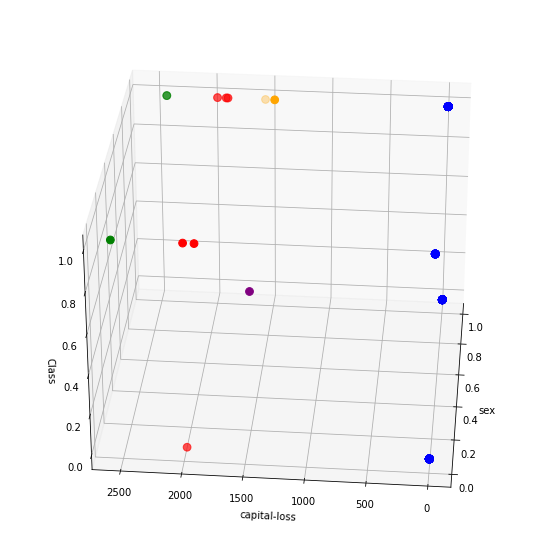

df_presentation:
    sex  capital-loss  class  label      sex  capital-loss  color
0    1             0      1      0     Male             0   Blue
1    0          2547      1      2   Female          2547  Green
2    1             0      0      0     Male             0   Blue
3    1             0      0      0     Male             0   Blue
4    1             0      1      0     Male             0   Blue
5    1             0      1      0     Male             0   Blue
6    1             0      1      0     Male             0   Blue
7    0             0      0      0   Female             0   Blue
8    0             0      0      0   Female             0   Blue
9    1             0      1      0     Male             0   Blue
10   1             0      1      0     Male             0   Blue
11   1          1887      1      1     Male          1887    Red
12   0             0      0      0   Female             0   Blue
13   1             0      0      0     Male             0   Blue
14   0 

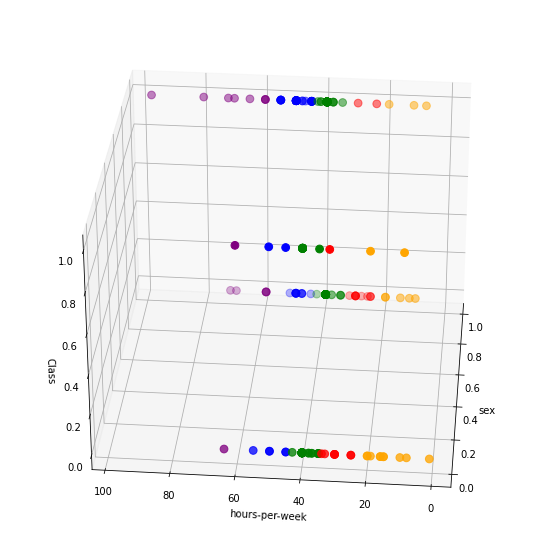

df_presentation:
    sex  hours-per-week  class  label      sex  hours-per-week   color
0    1              40      1      2     Male              40   Green
1    0              40      1      2   Female              40   Green
2    1              40      0      2     Male              40   Green
3    1              10      0      3     Male              10  Orange
4    1              43      1      2     Male              43   Green
5    1              40      1      2     Male              40   Green
6    1              40      1      2     Male              40   Green
7    0               1      0      3   Female               1  Orange
8    0              40      0      2   Female              40   Green
9    1              40      1      2     Male              40   Green
10   1              40      1      2     Male              40   Green
11   1              40      1      2     Male              40   Green
12   0              40      0      2   Female              40   Green
13

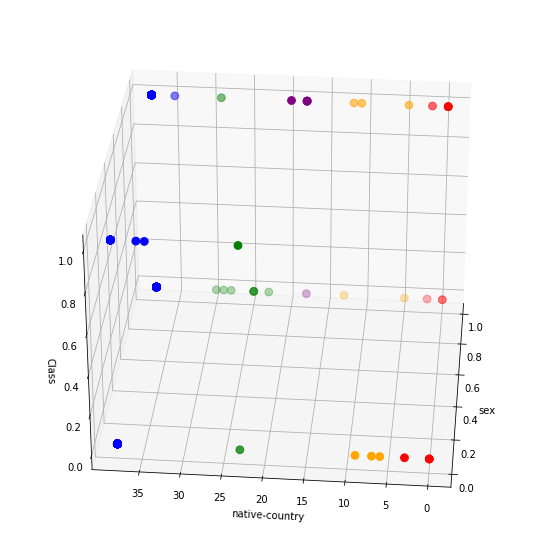

df_presentation:
    sex native-country  class  label      sex       native-country   color
0    1             38      1      0     Male        United-States    Blue
1    0             38      1      0   Female        United-States    Blue
2    1             38      0      0     Male        United-States    Blue
3    1             38      0      0     Male        United-States    Blue
4    1             38      1      0     Male        United-States    Blue
5    1             38      1      0     Male        United-States    Blue
6    1             38      1      0     Male        United-States    Blue
7    0              3      0      1   Female                China     Red
8    0             38      0      0   Female        United-States    Blue
9    1             18      1      4     Male                India  Purple
10   1             18      1      4     Male                India  Purple
11   1             38      1      0     Male        United-States    Blue
12   0             3

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


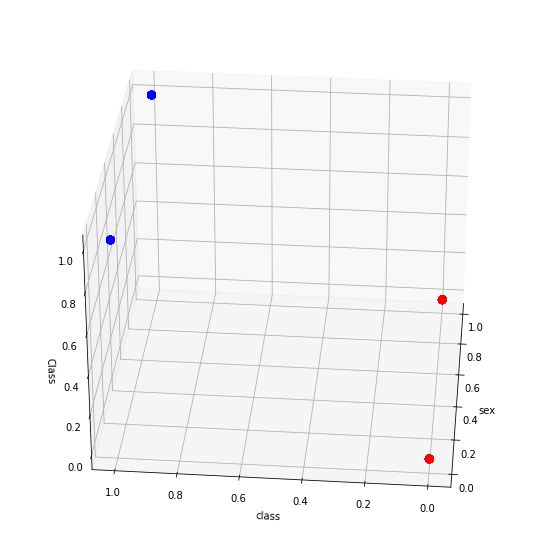

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import set_option
pd.set_option('max_rows',100)

df = pd.read_csv('Mall_Customers.csv')
mainpath = 'C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/'

#adult_data_RenameCol_MinMax_LE_5050
df_orig = pd.read_csv(mainpath + 'adult_data.csv',index_col = 0) #orig

dfy_explanation = pd.read_csv(mainpath + 'adult_data_Binary5050.csv',index_col = 0)
dfy = pd.read_csv(mainpath + 'adult_data_Binary5050_LE.csv',index_col = 0)
dfy_class = dfy['class']

dfy_explanation
colname_final_all = dfy_explanation.columns.to_list()
colname_final_all

desired_col1 = colname_final_all[univ_colnum] #age
for univ_count in range(univ_colnum+1, len(dfy_explanation)):
    desired_col2 = colname_final_all[univ_count] #workclass.. fnlwgt.. native-country

    dfx = dfy[[desired_col1, desired_col2]] 
    dfx.reset_index(drop = True,inplace= True)
    dfy_class.reset_index(drop = True,inplace= True)

    df = pd.concat([dfx,dfy_class],axis=1)

    df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    df.dropna(inplace=  True, axis=0)
    df = df[:300]

    km = KMeans(n_clusters=5)
    clusters = km.fit_predict(df.iloc[:,1:])
    df["label"] = clusters

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
    ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
    ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
    ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
    ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

    plt.xlabel(desired_col1)
    plt.ylabel(desired_col2)
    ax.set_zlabel('Class')

    ax.view_init(30, 185)#30, 185
    plt.show()

    df_temp = df.copy()
    df_temp.columns = [desired_col1, desired_col2, 'class', 'label']
    df_temp

    dfy_explanation_temp = dfy_explanation[[desired_col1, desired_col2]][:300]
    dfy_explanation_temp.reset_index(drop = True, inplace= True)
    dfy_explanation_temp
    df_presentation = pd.concat([df_temp, dfy_explanation_temp],axis=1)
    df_presentation

    df_presentation
    def get_label_color(x):
        if x == 0:
            col = 'Blue'
        if x == 1:
            col = 'Red'
        if x == 2:
            col = 'Green'
        if x == 3:
            col = 'Orange'
        if x == 4:
            col = 'Purple'
        return col

    df_presentation['color'] = df_presentation['label']
    df_presentation
    df_presentation['color'] = df_presentation['color'] .apply(lambda x: get_label_color(x))
    print("df_presentation:\n",df_presentation.head(50))
